Update: apply Normalized Difference Vegetation Index to distinguish building and vegetations with relative difference between R and G pixels

In [1]:
import numpy as np
# read in image data as n-dimension array
import os
imgdir = '../dataset'
imgfile1 = os.path.join(imgdir, 'k02-05m-cropped.png')
imgfile2 = os.path.join(imgdir, 'k12-05m-cropped.png')
from skimage import io
img1 = io.imread(imgfile1)
img2 = io.imread(imgfile2)
# rearrange pixel color channels
img1 = np.reshape(img1, img1.shape, order='F')
img2 = np.reshape(img2, img2.shape, order='F')

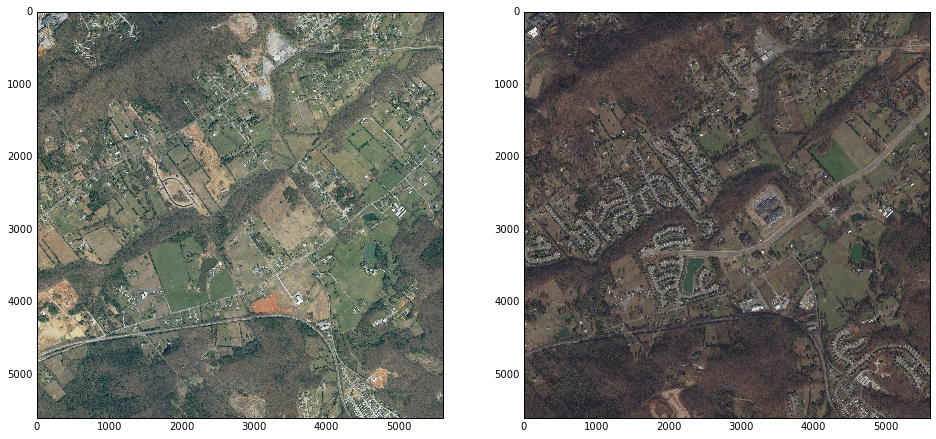

In [2]:
# show data
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(16,35))
plt.subplot(121).imshow(img1)
plt.subplot(122).imshow(img2)

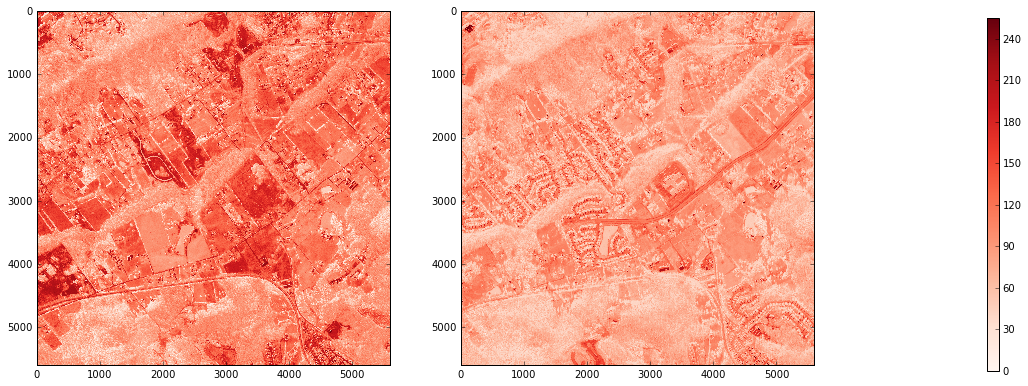

In [3]:
# show image in red color channel
fig, axes = plt.subplots(figsize=(16,35), nrows=1, ncols=2)
axes[0].imshow(img1[:,:,0], cmap=plt.cm.Reds)
im = axes[1].imshow(img2[:,:,0], cmap=plt.cm.Reds)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.95, 0.44, 0.01, 0.14])
fig.colorbar(im, cax=cbar_ax)

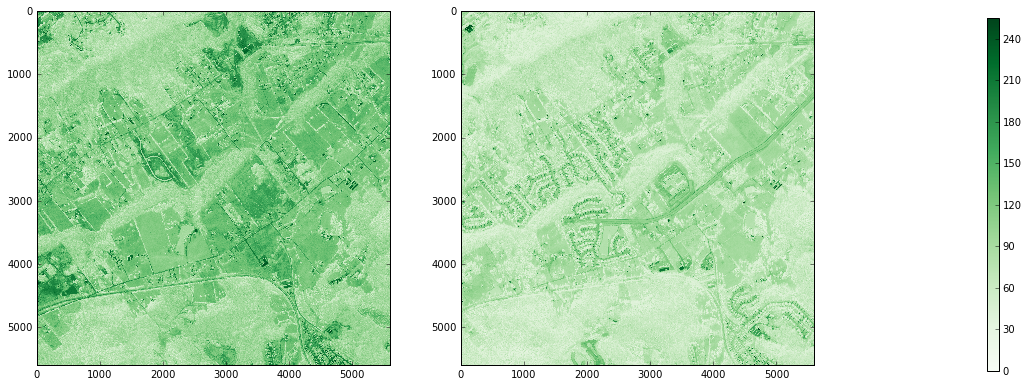

In [4]:
# show image in green color channel
fig, axes = plt.subplots(figsize=(16,35), nrows=1, ncols=2)
axes[0].imshow(img1[:,:,1], cmap=plt.cm.Greens)
im = axes[1].imshow(img2[:,:,1], cmap=plt.cm.Greens)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.95, 0.44, 0.01, 0.14])
fig.colorbar(im, cax=cbar_ax)

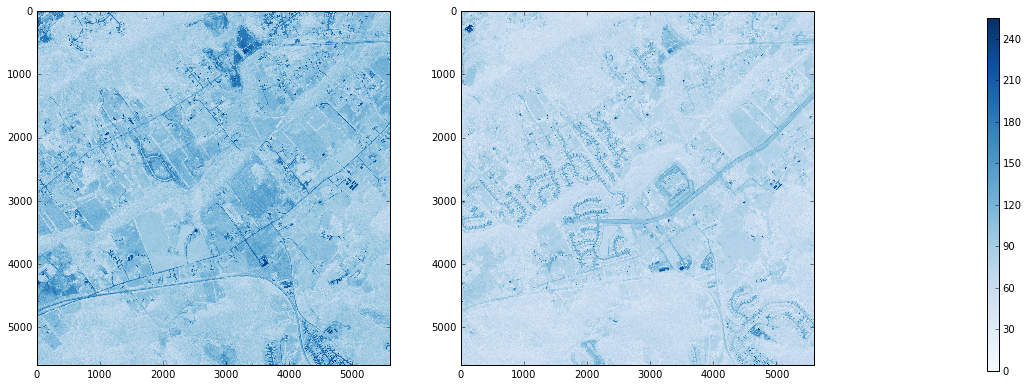

In [5]:
# show image in blue color channel
fig, axes = plt.subplots(figsize=(16,35), nrows=1, ncols=2)
axes[0].imshow(img1[:,:,2], cmap=plt.cm.Blues)
im = axes[1].imshow(img2[:,:,2], cmap=plt.cm.Blues)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.95, 0.44, 0.01, 0.14])
fig.colorbar(im, cax=cbar_ax)

In [6]:
#err_state = np.seterr(divide='ignore', invalid='ignore')
# scale inside each grid and apply NDVI to extend color vector dimensions
# additional color channel = (R - G)/(R+G)
# @param: 2D RGB image as ndarray
# @param: gamma to adjust brightnesss
# @return: image with RGB and NDVI channels
def apply_ndvi(image, gamma=1.0):
    nrows, ncols, ndims = image.shape[0], image.shape[1], image.shape[2]
    apr = 1e-10 # in case divied by zero
    image_new = np.ndarray(shape=(nrows, ncols, ndims+1), dtype=float)
    image_new[:,:,0:3] = image[:,:,0:3]
    image_new[:,:,0:3] = np.clip(gamma*image_new[:,:,0:3], 0, 255) # upper limit value for RGB color
    image_new[:,:,3] = (image_new[:,:,0] - image_new[:,:,1])/(image_new[:,:,0] + image_new[:,:,1] + apr) # (R-G)/(R+G)
    return image_new

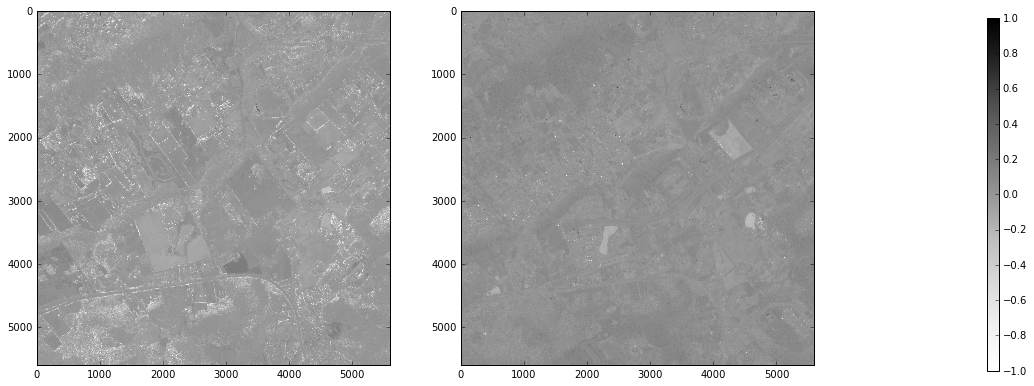

In [7]:
# apply NVDI and plot the additional dimension
img1 = apply_ndvi(img1)
img2 = apply_ndvi(img2, gamma=1.5)
fig, axes = plt.subplots(figsize=(16,35), nrows=1, ncols=2)
axes[0].imshow(img1[:,:,3], cmap=plt.cm.Greys)
im = axes[1].imshow(img2[:,:,3], cmap=plt.cm.Greys)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.95, 0.44, 0.01, 0.14])
fig.colorbar(im, cax=cbar_ax)

In [8]:
# divide image arrays into grids based on preset step size and scale RGB inside each grid
# @param: 2D RGB image as ndarray
# @param: grid_step_size should be divisible to image size
# @return: list of lists of divided ndarray (image grids)
def divide_image_into_grids_scaled(image, grid_step_size=50):
    assert image.shape[0]%grid_step==0
    assert image.shape[1]%grid_step==0
    image_grids = list()
    grid_rows = image.shape[0]/grid_step # number of grids along rows
    grid_cols = image.shape[1]/grid_step # number of grids along columns
    apr = 1e-10 # in case of zero division
    for r in range(grid_rows):
        row_image_grids = list()
        for c in range(grid_cols):
            tmp = image[r*grid_step:(r+1)*grid_step-1, c*grid_step:(c+1)*grid_step-1, :]
            minC, maxC = np.min(tmp[:,:,:3]), np.max(tmp[:,:,:3])
            for d in range(3):
                tmp[:,:,d] = (tmp[:,:,d] - minC)/(maxC - minC+apr)
            row_image_grids.append(tmp)
        image_grids.append(row_image_grids)
    return image_grids

In [9]:
# paraemeter setting to divide image into square grids
grid_step = 280 # unit in pixel, should be divisible to the image size
image_grids_1 = divide_image_into_grids_scaled(img1, grid_step)
image_grids_2 = divide_image_into_grids_scaled(img2, grid_step)

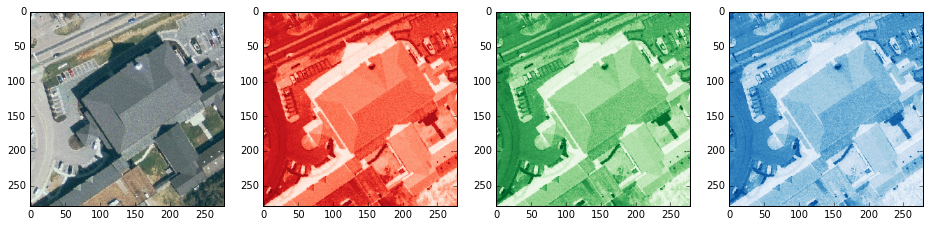

In [10]:
# plot example grids in RGB channels in image1
fig = plt.figure(figsize=(16,20))
plt.subplot(141).imshow(image_grids_1[0][0][:,:,:3])
plt.subplot(142).imshow(image_grids_1[0][0][:,:,0], cmap=plt.cm.Reds)
plt.subplot(143).imshow(image_grids_1[0][0][:,:,1], cmap=plt.cm.Greens)
plt.subplot(144).imshow(image_grids_1[0][0][:,:,2], cmap=plt.cm.Blues)

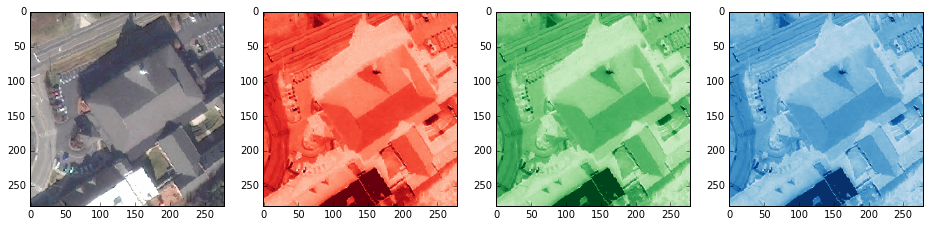

In [11]:
# plot example grids in RGB channels in image2
fig = plt.figure(figsize=(16,20))
plt.subplot(141).imshow(image_grids_2[0][0][:,:,:3])
plt.subplot(142).imshow(image_grids_2[0][0][:,:,0], cmap=plt.cm.Reds)
plt.subplot(143).imshow(image_grids_2[0][0][:,:,1], cmap=plt.cm.Greens)
plt.subplot(144).imshow(image_grids_2[0][0][:,:,2], cmap=plt.cm.Blues)

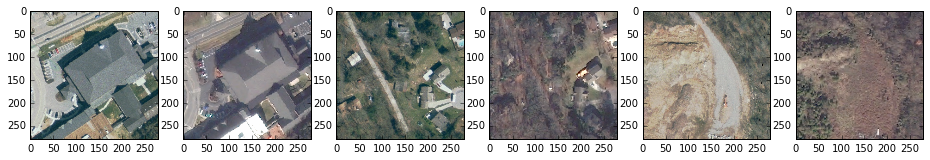

In [12]:
# plot example grids
fig = plt.figure(figsize=(16,50))
plt.subplot(161).imshow(image_grids_1[0][0][:,:,:3])
plt.subplot(162).imshow(image_grids_2[0][0][:,:,:3])
plt.subplot(163).imshow(image_grids_1[0][2][:,:,:3])
plt.subplot(164).imshow(image_grids_2[0][2][:,:,:3])
plt.subplot(165).imshow(image_grids_1[0][10][:,:,:3])
plt.subplot(166).imshow(image_grids_2[0][10][:,:,:3])

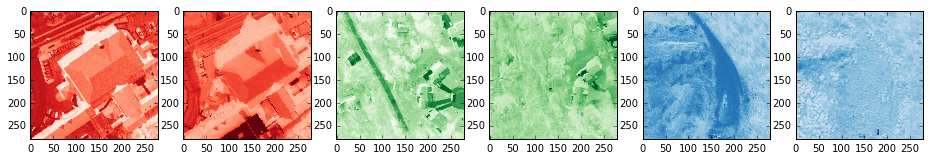

In [13]:
# plot single color channel
fig = plt.figure(figsize=(16,50))
plt.subplot(161).imshow(image_grids_1[0][0][:,:,0], cmap=plt.cm.Reds) # R
plt.subplot(162).imshow(image_grids_2[0][0][:,:,0], cmap=plt.cm.Reds)
plt.subplot(163).imshow(image_grids_1[0][2][:,:,1], cmap=plt.cm.Greens) # G
plt.subplot(164).imshow(image_grids_2[0][2][:,:,1], cmap=plt.cm.Greens)
plt.subplot(165).imshow(image_grids_1[0][10][:,:,2], cmap=plt.cm.Blues) # B
plt.subplot(166).imshow(image_grids_2[0][10][:,:,2], cmap=plt.cm.Blues)

In [14]:
# approximate an image by a Gaussian distribution
# @param image matrix
# @return mean and variance matrix for this gaussian distribution
def image_to_gaussian_distribution(image):
    # convert image pixels into list of vectors
    data = list() # convert each pixel info into a vector
    rows, cols, channels = image.shape
    for r in range(rows):
        vecs = image[r]
        data.extend(vecs)
    # fit data into a gaussian distribution
    data_mean = np.mean(data, axis=0) # mean vector of gaussian distribution
    data_cov = np.cov(data, rowvar=False) # covariance matrix of gaussian distribution
    return (data_mean, data_cov)

In [15]:
# convert each grid into a gaussian distribution, save gaussian parameters into a list
num_of_rows = len(image_grids_1)
num_of_cols = len(image_grids_1[0])
image_gaussians_1 = list()
for r in range(num_of_rows):
    image_gaussians_1.append(map(image_to_gaussian_distribution, image_grids_1[r]))
image_gaussians_2 = list()
for r in range(num_of_rows):
    image_gaussians_2.append(map(image_to_gaussian_distribution, image_grids_2[r]))
# image_gaussians_1 = np.matrix(image_gaussians_1, dtype=float)
# image_gaussians_2 = np.matrix(image_gaussians_2, dtype=float)
# print image_gaussians_1.shape, image_gaussians_2.shape

In [16]:
# compute the Kullback–Leibler(KL) divergence between two Gaussian distributions
# @param mean and covariance matrix of two gaussian distributions
# @return KL divergence (asymmetric)
def gaussian_KL_divergence(gsd_1, gsd_2):
    gp_mean, gp_cov = gsd_1[0], gsd_1[1] # mean and covariance of gaussian distr
    gq_mean, gq_cov = gsd_2[0], gsd_2[1]
    term1 = np.log(np.linalg.det(gp_cov) / np.linalg.det(gq_cov))
    mat_inv_q = np.linalg.inv(gq_cov)
    term2 = np.trace(np.matmul(mat_inv_q, gp_cov))
    diff_mean_pq = gp_mean-gq_mean
    term3 = np.matmul(diff_mean_pq, np.matmul(mat_inv_q, np.matrix.transpose(diff_mean_pq)))
    KL_div = (term1 + term2 + term3) / 2
    return KL_div

def symmetric_KL_divergence(gsd_1, gsd_2):
    return (gaussian_KL_divergence(gsd_1, gsd_2)+gaussian_KL_divergence(gsd_2, gsd_1)) / 2

In [17]:
KL_div_map = list()
for r in range(num_of_rows):
    KL_div_map.append(map(symmetric_KL_divergence, image_gaussians_1[r], image_gaussians_2[r]))
print len(KL_div_map), len(KL_div_map[0])

20 20


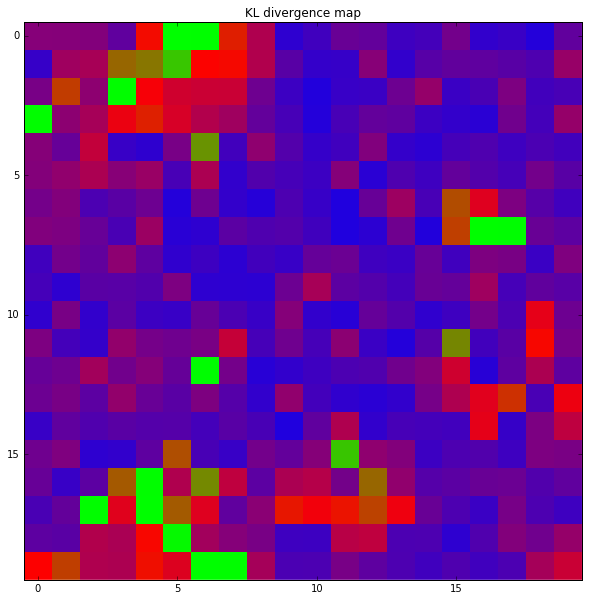

In [18]:
fig = plt.figure(figsize=(10,10))
plt.imshow(KL_div_map, cmap=plt.get_cmap('brg'), vmin=0, vmax=50, interpolation='none')
plt.title("KL divergence map")
plt.show()

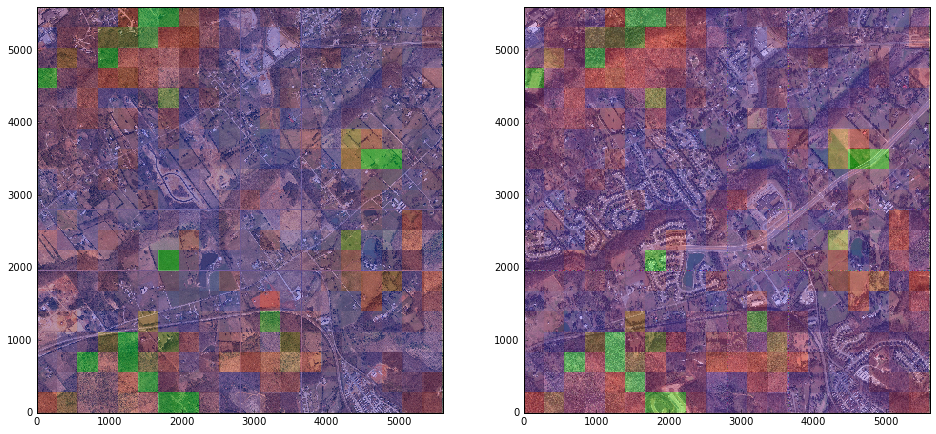

In [19]:
# plot KL map overlaid on satellite map for comparison of changes
fig = plt.figure(figsize=(16,35))
extent = 0, img2.shape[0], 0, img2.shape[1]
plt.title("KL divergence map for change detection")
plt.subplot(121).imshow(img1[:,:,:3], extent=extent)
plt.subplot(121).imshow(KL_div_map, cmap=plt.get_cmap('brg'), vmin=0, vmax=50, interpolation='none', alpha=0.3, extent=extent)
plt.subplot(122).imshow(img2[:,:,:3], extent=extent)
plt.subplot(122).imshow(KL_div_map, cmap=plt.get_cmap('brg'), vmin=0, vmax=50, interpolation='none', alpha=0.3, extent=extent)
plt.show()

In [74]:
# Build GMM model-based clustering model by subset of KL divergence map
KL_values = np.vstack(np.ravel(KL_div_map)) # flatten the 2D matrix to 1D array, then transpose into column
sample_ratio = 0.6 # subset ratio in full data set
import random
KL_samples = random.sample(KL_values, int(sample_ratio*len(KL_values))) # select subset
K = 4 # number of gaussian mixtures
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=K)
# from GaussianMixtureModel import GaussianMixtureModel
# gmm = GaussianMixtureModel(n_components=K)
gmm.fit(KL_samples) # training GMM model

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=4, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [75]:
# Apply GMM clustering model to categorize the changes on KL divergence map
KL_change_map = list()
for KL_div_row in KL_div_map:
    KL_change_map.append(gmm.predict(np.vstack(KL_div_row)))
print len(KL_change_map), len(KL_change_map[0])

20 20


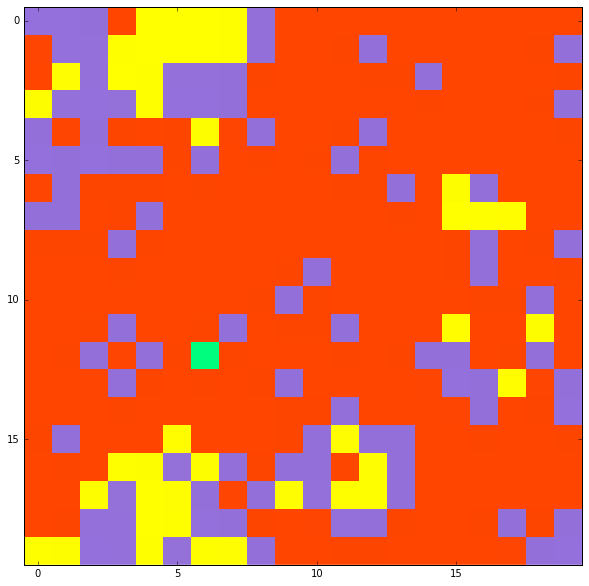

In [76]:
# Plot the change map to detect changes
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
from matplotlib import colors
cmap = colors.LinearSegmentedColormap.from_list('segmented', ['#3366cc','#33cc33', '#ffcc00', '#ff0000'], N=K)
cmap1 = colors.LinearSegmentedColormap.from_list(11, colors =['MediumPurple', 'SpringGreen', 'Yellow', 'OrangeRed'],N=K)
# extent = 0, img1.shape[0], 0, img1.shape[1]
# plt.imshow(img1, extent=extent)
plt.imshow(KL_change_map, cmap=cmap1, interpolation='none', alpha=1.0)
plt.show()

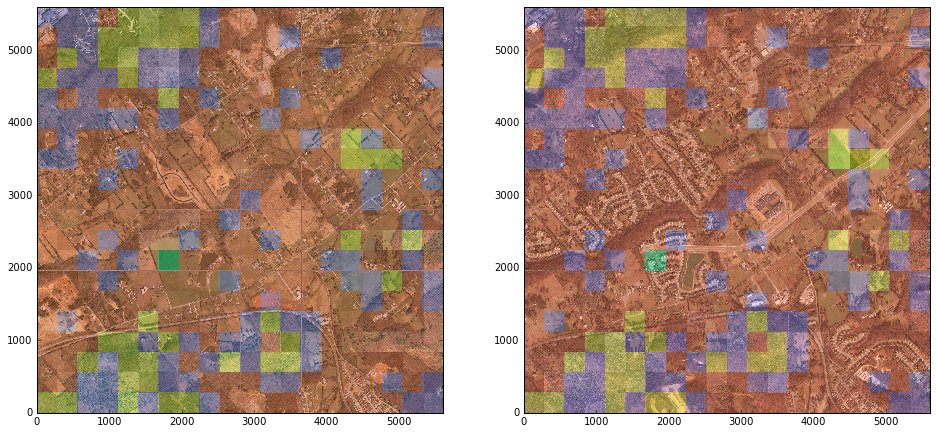

In [77]:
# overlaid GMM change cluster map on satellite maps for comparison and evaluation
fig = plt.figure(figsize=(16,35))
from matplotlib import colors
cmap1 = colors.LinearSegmentedColormap.from_list(11, colors =['MediumPurple', 'SpringGreen', 'Yellow', 'OrangeRed'],N=K)
extent = 0, img2.shape[0], 0, img2.shape[1]
plt.subplot(121).imshow(img1[:,:,:3], extent=extent)
plt.subplot(121).imshow(KL_change_map, cmap=cmap1, interpolation='none', alpha=0.3, extent=extent)
plt.legend()
plt.subplot(122).imshow(img2[:,:,:3], extent=extent)
plt.subplot(122).imshow(KL_change_map, cmap=cmap1, interpolation='none', alpha=0.3, extent=extent)
plt.legend()
plt.show()